# Part I $-$ Chapter 3 $-$ Monte Carlo Simulations
Monte Carlo simulations are quite a large topic and as such I thought it was a good idea to create a separate notebook for them.

Essentially we're going to simulate a bunch of paths w/ our geometric brownian motion to observe how they behave. We can represent the Black-Sholes-Merton stochastic differential equation as:

$$
dS_t = rS_tdt+\sigma S_tdZ_t
$$

From my past experience in "Stochastic Differential Equations" we can go ahead and simulate this d.e. using the Euler-Maruyama scheme.

In [58]:
from jax import vmap
import jax.random as random
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [87]:
# model params
num_steps = 100
T = 1.0
dt = T/num_steps
r = 0.05
sigma = 0.20
S0 = 100.0

# initiating the list of stock prices w/ initial value S0
S = jnp.zeros(num_steps)
S = S.at[0].set(S0)

# initiaing brownian motion noise variable.
key = random.PRNGKey(0)
Z = random.normal(key, shape=(num_steps,))

for i in range(num_steps - 1):
    euler_maruyama = S[i] * jnp.exp((r-(1/2)*sigma**2)*dt + sigma*jnp.sqrt(dt)*Z[i])   
    S = S.at[i+1].set(euler_maruyama)

Here we've simulated one singular path. Now we go ahead and simulate more and take the averages of those paths.

In [88]:
num_paths = 100

all_paths = []

for i in range(num_paths):
    # initiating the list of stock prices w/ initial value S0
    S = jnp.zeros(num_steps)
    S = S.at[0].set(S0)

    # initiaing brownian motion noise variable.
    key = random.PRNGKey(i)
    Z = random.normal(key, shape=(num_steps,))

    for i in range(num_steps - 1):
        euler_maruyama = S[i] * jnp.exp((r-(1/2)*sigma**2)*dt + sigma*jnp.sqrt(dt)*Z[i])   
        S = S.at[i+1].set(euler_maruyama)
    
    all_paths.append(S)

In [89]:
all_paths = jnp.array(all_paths)

In [90]:
mean_path = vmap(lambda x: jnp.mean(x), in_axes=(1))(all_paths)

In [91]:
time = jnp.arange(0.0, T, dt)

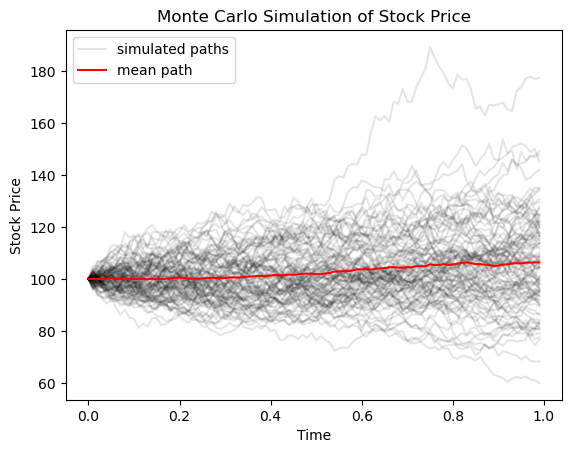

In [92]:
plt.plot(time, all_paths[0, :], color='k', alpha=0.1, label='simulated paths')
for i in range(1, num_paths):
    plt.plot(time, all_paths[i, :], color='k', alpha=0.1)

plt.plot(jnp.arange(0.0, T, dt), mean_path, color='r', label='mean path')
plt.title('Monte Carlo Simulation of Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()